In [1]:
from Experiment2rev1 import *

from ToyDataset import ToyDataset

from torch.utils.data import random_split
from torch.utils.data import DataLoader
import warnings
import skdim

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

torch.manual_seed(43)

# Dataset definition

tag: 0, class: ['A-left', 'sx high-low']
tag: 1, class: ['A-right', 'dx high-low']
tag: 2, class: ['B-left', 'sx low-high']
tag: 3, class: ['B-right', 'dx low-high']


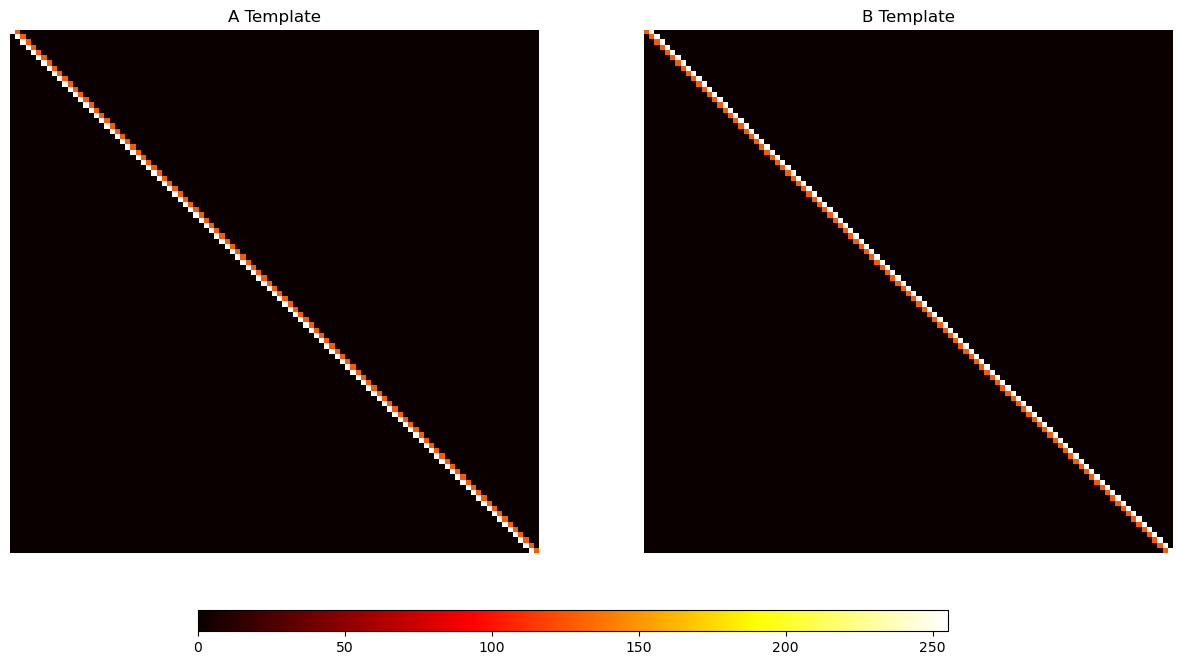

tag: 0, class: ['A', 'high-low']
tag: 1, class: ['B', 'low-high']


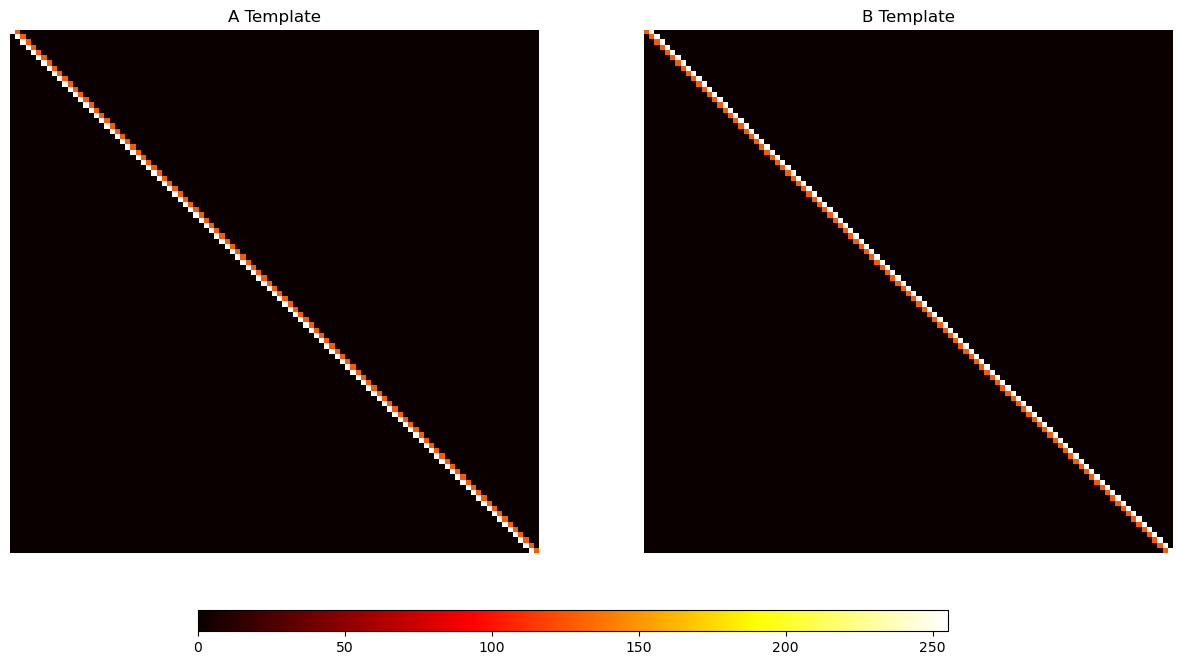

In [2]:
dset = ToyDataset(noise_level=10, class_values=(127, 255), input_size=101, inter_class_size=10, binary=False)
binary_dset = ToyDataset(noise_level=10, class_values=(127, 255), input_size=101, inter_class_size=10, binary=True)

trainset, testset = random_split(dset, [0.8, 0.2])
btrainset, btestset = random_split(binary_dset, [0.8, 0.2])

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

btrainloader = DataLoader(btrainset, batch_size=BATCH_SIZE, shuffle=True)
btestloader = DataLoader(btestset, batch_size=BATCH_SIZE, shuffle=False)

dset.show_label_map()
dset.show_templates()
binary_dset.show_label_map()
binary_dset.show_templates()

# Phase 1

100%|██████████| 100/100 [00:08<00:00, 12.40it/s]


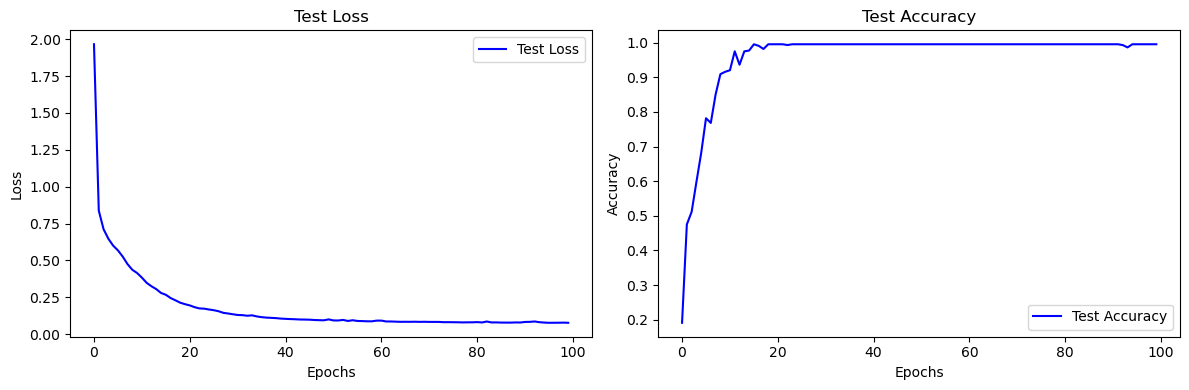

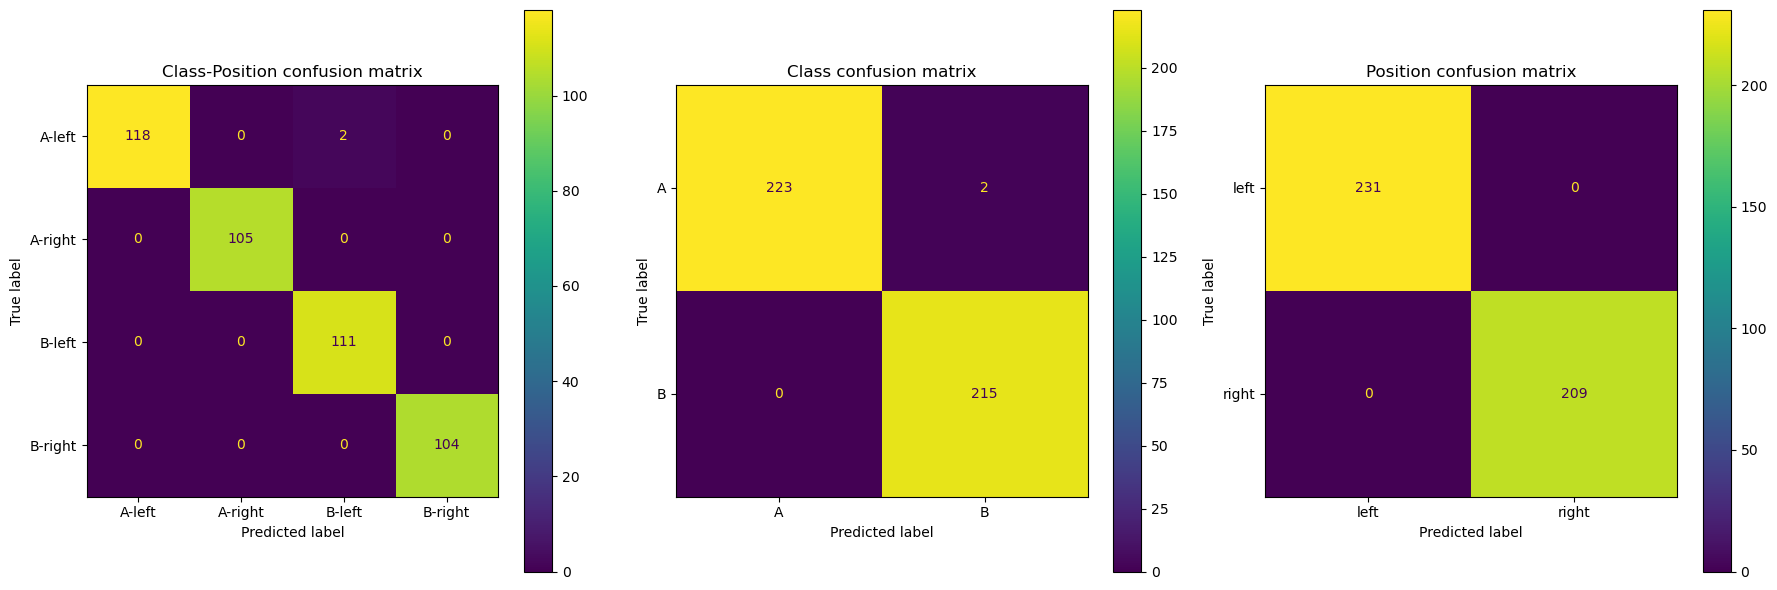

In [3]:
model1 = SimpleArchitecture(filter_size=2, input_size=dset.input_size, output_size=len(dset.label_map.keys()))

phase1 = Experiment2rev1(trainloader=trainloader, testloader=testloader, model=model1, lr=1e-2, epochs=100)

phase1.run()

# Phase 2

Phase done with MaxPool just learning the classification head

100%|██████████| 100/100 [00:05<00:00, 17.37it/s]


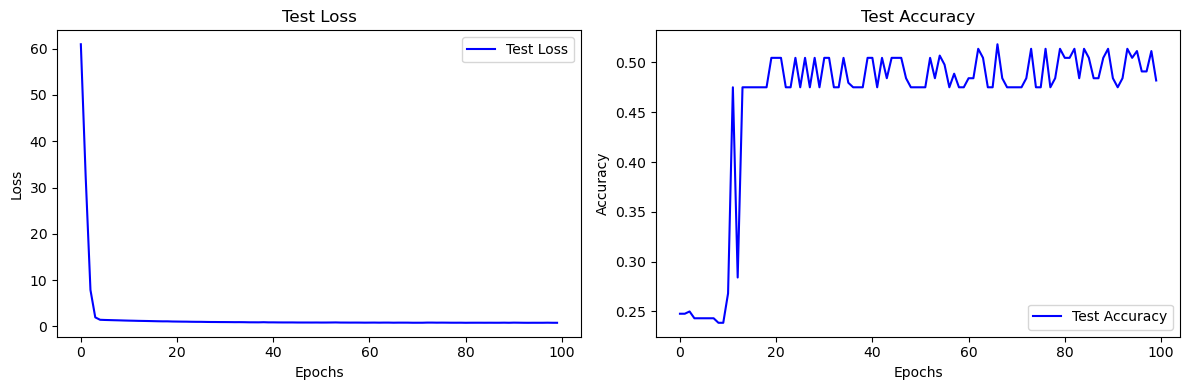

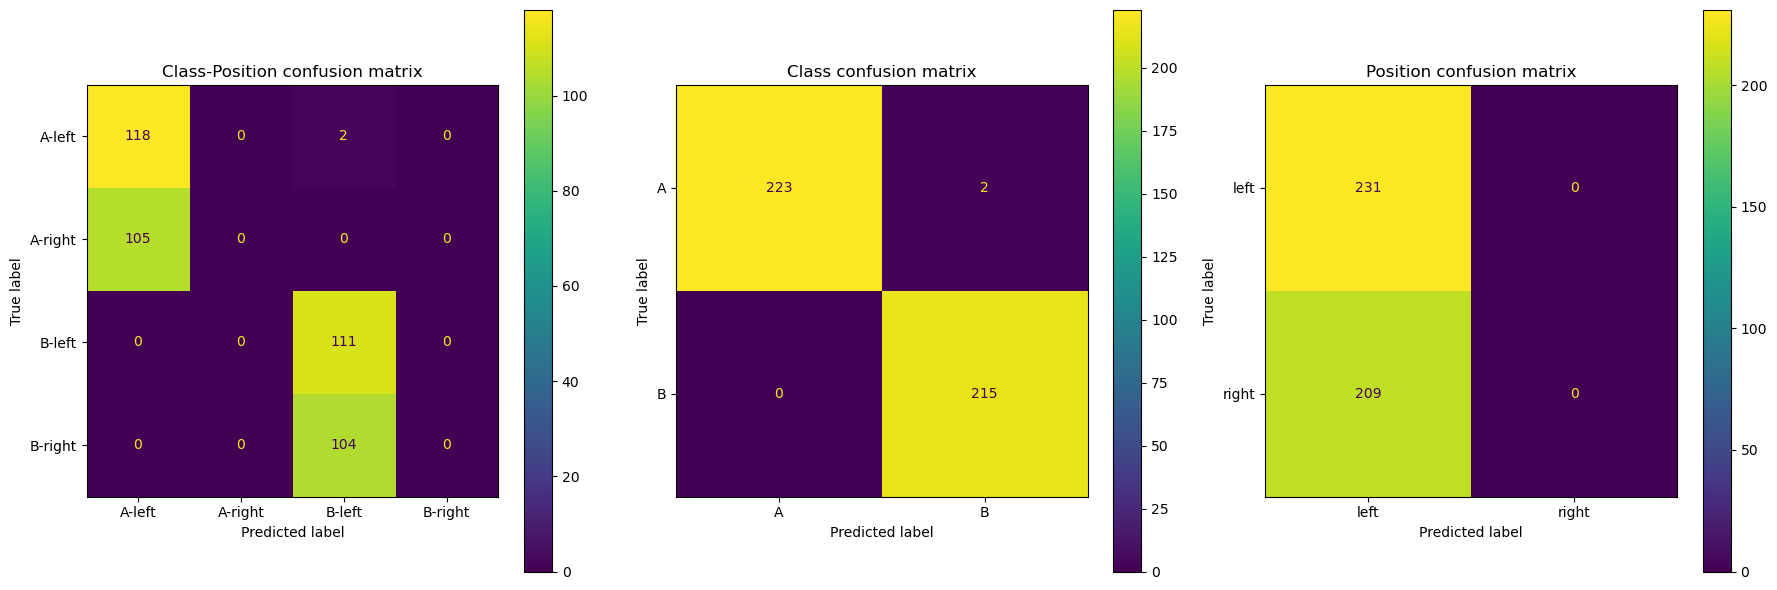

In [4]:
model2 = SimpleArchitectureWithPooling(filter_size=2, input_size=dset.input_size, pooling=torch.nn.MaxPool1d, max_pool_size=100, fc_output_size=4)

model2.conv[0] = model1.conv[0]
model2.conv[1] = model1.conv[1]

model2.conv.apply(lambda m: set_requires_grad(m, False))

phase2 = Experiment2rev1(trainloader=trainloader, testloader=testloader, model=model2, lr=1e-2, epochs=100)

phase2.run()

# Phase 3

Phase 3 done with average polling just learning the classification head

100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


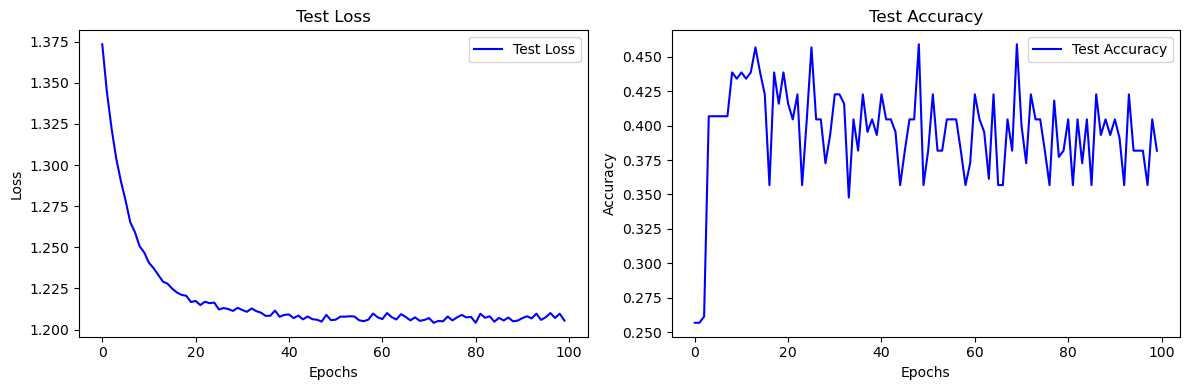

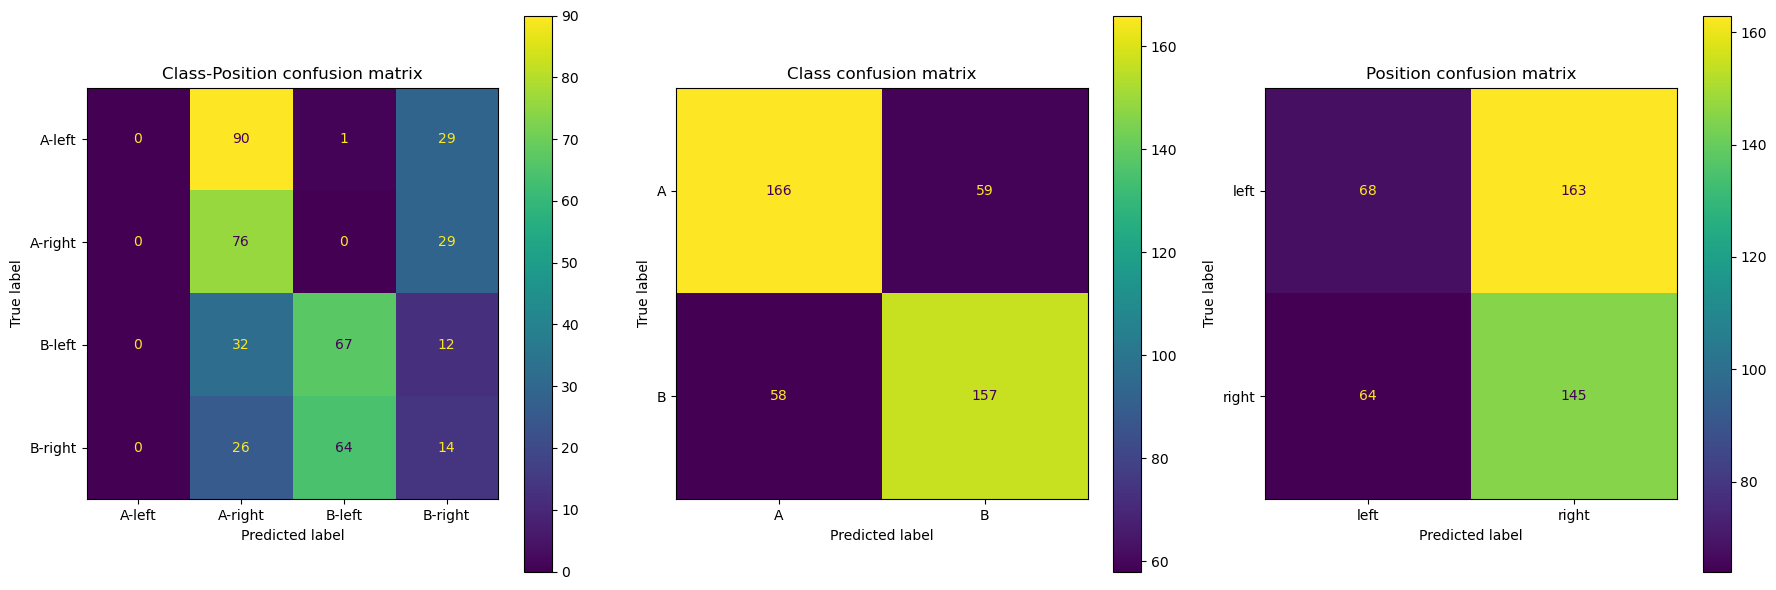

In [5]:
model3 = SimpleArchitectureWithPooling(filter_size=2, input_size=dset.input_size, pooling=torch.nn.AvgPool1d, max_pool_size=100, fc_output_size=4)

model3.conv[0] = model1.conv[0]
model3.conv[1] = model1.conv[1]

model3.conv.apply(lambda m: set_requires_grad(m, False))

phase3 = Experiment2rev1(trainloader=trainloader, testloader=testloader, model=model3, lr=1e-2, epochs=100)

phase3.run()

# Phase 4

Phase 4 done with max polling with full learning

100%|██████████| 200/200 [00:15<00:00, 13.10it/s]


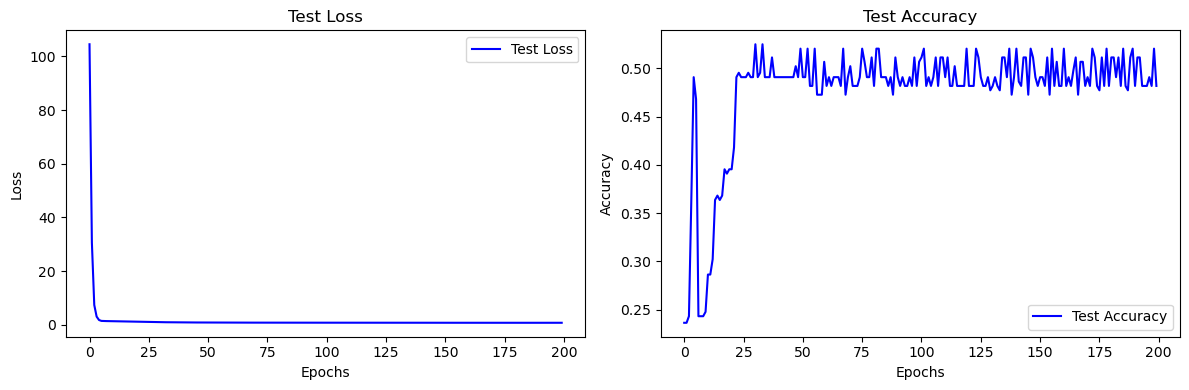

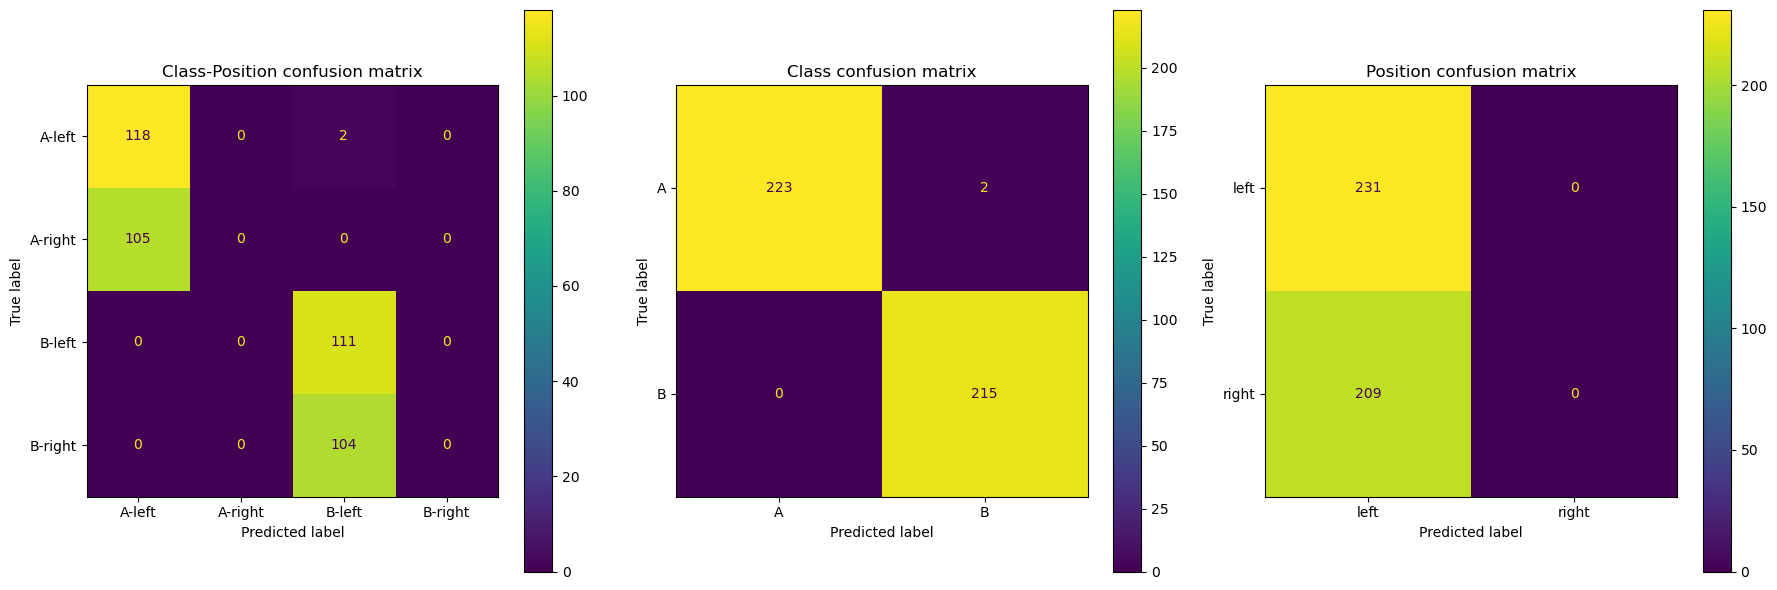

In [6]:
model4 = SimpleArchitectureWithPooling(filter_size=2, input_size=dset.input_size, pooling=torch.nn.MaxPool1d, max_pool_size=100, fc_output_size=4)

phase4 = Experiment2rev1(trainloader=trainloader, testloader=testloader, model=model4, lr=1e-2, epochs=200)

phase4.run()

# Phase 5

Phase 5 done with average polling with full learning

100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


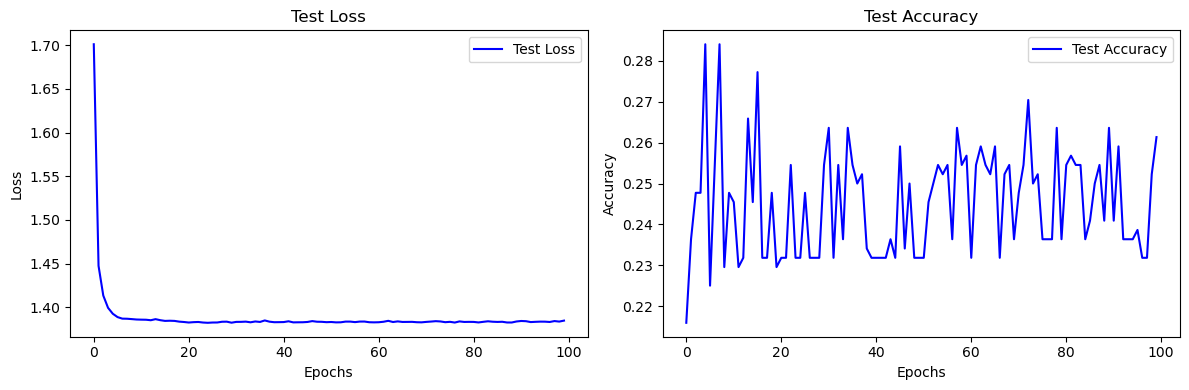

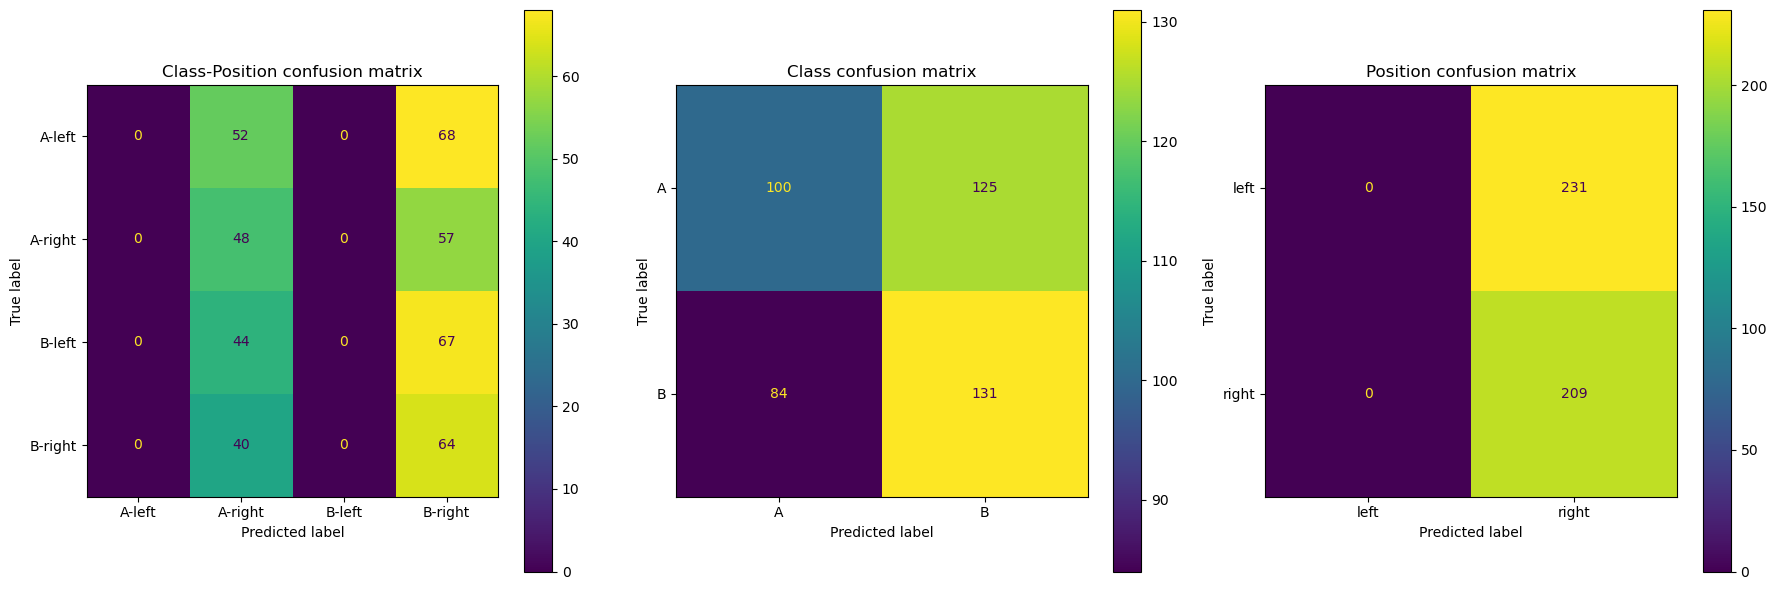

In [7]:
model5 = SimpleArchitectureWithPooling(filter_size=2, input_size=dset.input_size, pooling=torch.nn.AvgPool1d, max_pool_size=100, fc_output_size=4)

phase5 = Experiment2rev1(trainloader=trainloader, testloader=testloader, model=model5, lr=1e-2, epochs=100)

phase5.run()